In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import numpy as np
import pandas as pd

In [11]:
# import datetime
from datetime import datetime, timedelta
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import operators, extract

In [13]:
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model using automap_base()
Base = automap_base()
# reflect the tables with Base.prepare(), passing in the engine and reflect=True
Base.prepare(engine, reflect=True)

In [15]:
# We can view all of the classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our Session() and bind it to the engine
session = Session(engine)

In [18]:
#measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23d28e587c0>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01'}

In [19]:
# station
first_r = session.query(Station).first()
first_r.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23d28e58dc0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Analysis

In [20]:
last_datapoint_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_datapoint_date

('2017-08-23')

In [21]:
last_datapoint_date[0]

'2017-08-23'

##### Design a query to retrieve the last 12 months of precipitation data

In [22]:
# Calculate the date 1 year ago from the last data point in the database

# Use the datetime.timedelta() function to help calculating the difference of one year, 12 months, or 365 days
One_year = datetime.strptime(last_datapoint_date[0],'%Y-%m-%d')- timedelta(days=365)
One_year_fmt = One_year.strftime('%Y-%m-%d') 
One_year_fmt

'2016-08-23'

In [ ]:
# tryagain = session.query(Measurement.prcp, Measurement.date)
# tryagain

In [36]:
# tryagain.filter(Measurement.date > One_year_fmt).all()

[(0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-10-06'),
 (0.0, '2016-1

In [59]:
# Use session.query() to retrieve the date and prcp columns, .filter() by the date you calculated above, and selecting .all() results

station_measurement = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > One_year_fmt).all()
station_measurement 

#pd.DataFrame(session.query(Dow.date).filter(Dow.date > '2011-03-01').order_by(Dow.date).all())

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [60]:
prcp_pairs = []
for date, prcp in station_measurement:
    dict_row = {}
    dict_row["prcp"] = prcp
    dict_row["date"] = date
    prcp_pairs.append(dict_row)

In [61]:
prcp_pairs

[{'prcp': 0.08, 'date': '2016-08-24'},
 {'prcp': 0.08, 'date': '2016-08-25'},
 {'prcp': 0.0, 'date': '2016-08-26'},
 {'prcp': 0.0, 'date': '2016-08-27'},
 {'prcp': 0.01, 'date': '2016-08-28'},
 {'prcp': 0.0, 'date': '2016-08-29'},
 {'prcp': 0.0, 'date': '2016-08-30'},
 {'prcp': 0.13, 'date': '2016-08-31'},
 {'prcp': 0.0, 'date': '2016-09-01'},
 {'prcp': 0.0, 'date': '2016-09-02'},
 {'prcp': 0.0, 'date': '2016-09-03'},
 {'prcp': 0.03, 'date': '2016-09-04'},
 {'prcp': None, 'date': '2016-09-05'},
 {'prcp': None, 'date': '2016-09-06'},
 {'prcp': 0.05, 'date': '2016-09-07'},
 {'prcp': 0.0, 'date': '2016-09-08'},
 {'prcp': 0.03, 'date': '2016-09-09'},
 {'prcp': 0.0, 'date': '2016-09-10'},
 {'prcp': 0.05, 'date': '2016-09-11'},
 {'prcp': 0.0, 'date': '2016-09-12'},
 {'prcp': 0.02, 'date': '2016-09-13'},
 {'prcp': 1.32, 'date': '2016-09-14'},
 {'prcp': 0.42, 'date': '2016-09-15'},
 {'prcp': 0.06, 'date': '2016-09-16'},
 {'prcp': 0.05, 'date': '2016-09-17'},
 {'prcp': 0.0, 'date': '2016-09-18'

In [24]:
session = Session(engine)
last_datapoint_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
One_year = datetime.strptime(last_datapoint_date[0],'%Y-%m-%d')- timedelta(days=365)
One_year_fmt = One_year.strftime('%Y-%m-%d')
# station_measurement = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > One_year_fmt).all()
temperature = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= One_year_fmt).order_by(Measurement.date.asc()).all()
session.close()

In [25]:
temperature

[('2016-08-23', 81.0),
 ('2016-08-23', 76.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 77.0),
 ('2016-08-23', 74.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 76.0),
 ('2016-08-24', 80.0),
 ('2016-08-24', 78.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 77.0),
 ('2016-08-24', 74.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-26', 79.0),
 ('2016-08-26', 78.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 84.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 77.0),
 ('2016-08-27', 73.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 75.0),
 ('2016-08-27', 74.0),
 ('2016-08-28', 78.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 81.0),
 ('2016-08-28', 80.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 71.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 80.0),
 ('2016-08-29', 80.0),
 ('2016-08-

In [26]:
# Save the query results as a Pandas DataFrame() and set the index to the date column
station_measurement_df =pd.DataFrame(station_measurement)
station_measurement_df

,prcp,date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
...,...,...
2218,0.09,2017-08-19
2219,NaN,2017-08-20
2220,0.56,2017-08-21
2221,0.50,2017-08-22


In [27]:
station_measurement_df['date'].astype('datetime64[ns]')

# df['time'].astype('datetime64[ns]')
station_measurement_df['date'] = station_measurement_df['date'].astype('datetime64[ns]')
station_measurement_df

,prcp,date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
...,...,...
2218,0.09,2017-08-19
2219,NaN,2017-08-20
2220,0.56,2017-08-21
2221,0.50,2017-08-22


In [28]:
# Sort the dataframe by date
Azz = station_measurement_df.sort_values(by=['date'],ascending=True)
ABC= Azz.set_index('date').dropna()
ABC

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [29]:
ABC.reset_index().groupby('date').mean()

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [30]:
import matplotlib.dates as mdates

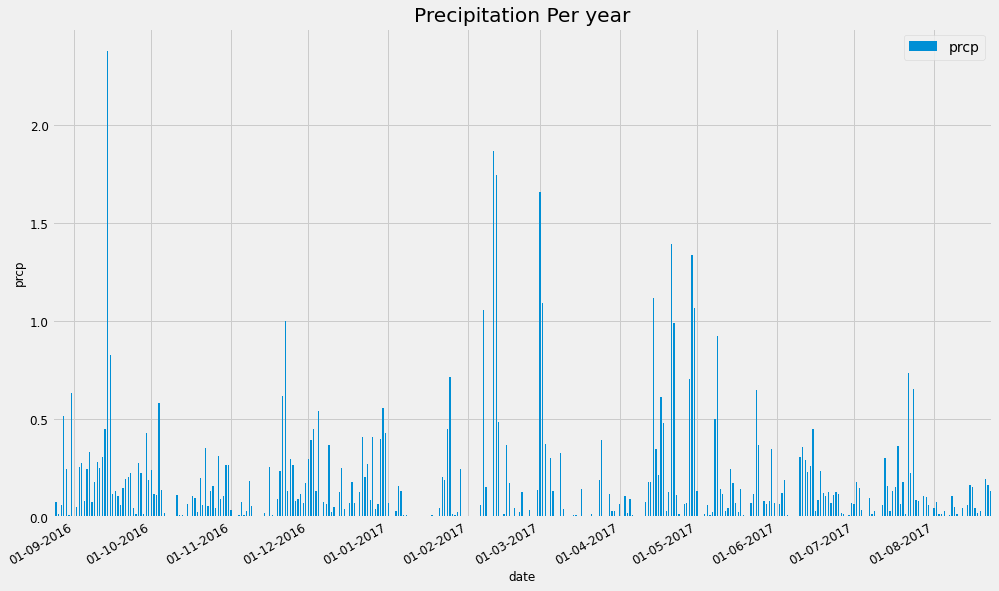

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = ABC.reset_index().groupby('date').mean().plot(kind='bar',title ="Precipitation Per year", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("prcp", fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.show()



In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
ABC.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


##### Design a query to show how many stations are available in this dataset


In [72]:
# What are the most active stations? (i.e. what stations have the most rows)?
session.query(Measurement).group_by(Measurement.station).count()

9

In [33]:
# List the stations and the counts in descending order. Hint: session.query() the station column in the Station table
most_active_count = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
most_active_count= most_active_count[0][0]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
aggregates = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
temp_data = session.query(*aggregates).filter(Measurement.date >= most_active_count).all()

In [36]:
# Choose the station with the highest number of temperature observations.
highest_temp = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
highest = highest_temp[0]

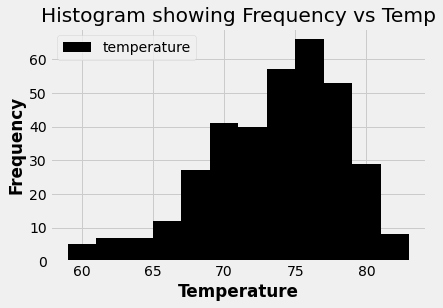

In [37]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_12 = session.query(Measurement.tobs).filter(Measurement.date>= One_year_fmt).filter(Measurement.station == highest).all()
temp_12_df = pd.DataFrame(temp_12,columns=['temperature'])
temp_12_df

temp_12_df.plot.hist(bins=12,color='black', title = "Histogram showing Frequency vs Temp")
plt.xlabel('Temperature',weight='bold')
plt.ylabel('Frequency',weight='bold')

# plt.savefig("Images/frequency.png", bbox_inches="tight")
plt.show()

## Bonus Challenge Assignment

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return (session.query(func.min(Measurement.tobs), 
                         func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs))
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#calc_temps(start_date, end_date)
start_date = dt.date(2016, 1 ,1)
end_date = dt.date(2016, 1 ,15)
previous_yeardate = calc_temps('2016-01-01', '2016-01-15')
previous_yeardate 

[(62.0, 69.70786516853933, 78.0)]

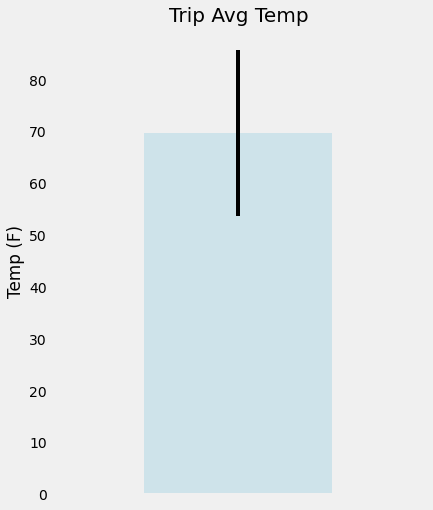

In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

previous_yeardate_df = pd.DataFrame(previous_yeardate, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
previous_yeardate_df
avg_temp = previous_yeardate_df['Avg Temp']
tmax_tmin =previous_yeardate_df.iloc[0]['Max Temp'] - previous_yeardate_df.iloc[0]['Min Temp']

avg_temp.plot(kind='bar', yerr=tmax_tmin, figsize=(6,8), alpha=0.5, color='lightblue')
plt.title('Trip Avg Temp', fontsize=20)
plt.ylabel('Temp (F)')
plt.xticks([])
plt.grid()


In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall_params = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
rainfall_params

# start_date, end_date
rainfall = session.query(*rainfall_params).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
    
rainfallstation_df = pd.DataFrame(rainfall, columns=["Station", "Station Name", "Latitude", "Longitude", "Elevation", "Total Precipitation"])

rainfallstation_df


,Station,Station Name,Latitude,Longitude,Elevation,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2.94
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.03
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.69
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.61
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.23
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.13
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [43]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.min(Measurement.tobs), 
                          func.avg(Measurement.tobs), 
                          func.max(Measurement.tobs))
                   .filter(func.strftime("%m-%d", Measurement.date) == date)
                   .all())
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Plot the daily normals as an area plot with `stacked=False`


In [53]:
# Set the start and end date of the trip
# start_date = 2017-8-30
# end_date = dt.date(2017, 9 ,21)
# Use the start and end date to create a range of dates
date_range = pd.date_range(start="2017-08-30",end="2017-09-21")
date_range

DatetimeIndex(['2017-08-30', '2017-08-31', '2017-09-01', '2017-09-02',
               '2017-09-03', '2017-09-04', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10',
               '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
               '2017-09-15', '2017-09-16', '2017-09-17', '2017-09-18',
               '2017-09-19', '2017-09-20', '2017-09-21'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# Stip off the year and save a list of %m-%d strings
date_list =[]
for x in date_range:
    date_list.append(x.strftime("%m-%d"))

In [46]:
date_list

['08-30',
 '08-31',
 '09-01',
 '09-02',
 '09-03',
 '09-04',
 '09-05',
 '09-06',
 '09-07',
 '09-08',
 '09-09',
 '09-10',
 '09-11',
 '09-12',
 '09-13',
 '09-14',
 '09-15',
 '09-16',
 '09-17',
 '09-18',
 '09-19',
 '09-20',
 '09-21']

In [ ]:
# Loop through the list of %m-%d strings and calculate the normals for each date
# each_normals =[]
# for i in date_list:
#      def daily_normals(date =i)
